In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with Normalizer()

data_scaled = Normalizer(norm='l2').fit_transform(data.reshape(1,-1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
data_scaled = data_scaled.flatten()

In [8]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [9]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [10]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [11]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((40), batch_input_shape=(None,5,1), return_sequences=True))
model.add(keras.layers.LSTM((1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

W0720 21:59:38.086131 26088 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 40)             6720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 168       
Total params: 6,888
Trainable params: 6,888
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(148,5,1), y_train, epochs=1000, validation_data=(x_test.reshape(37,5,1), y_test))

W0720 21:59:40.859479 26088 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 1s 10ms/sample - loss: 0.0435 - acc: 0.0000e+00 - val_loss: 0.0857 - val_acc: 0.0000e+00
Epoch 2/1000
148/148 [==============================] - 0s 273us/sample - loss: 0.0279 - acc: 0.0000e+00 - val_loss: 0.0596 - val_acc: 0.0000e+00
Epoch 3/1000
148/148 [==============================] - 0s 256us/sample - loss: 0.0221 - acc: 0.0000e+00 - val_loss: 0.0450 - val_acc: 0.0000e+00
Epoch 4/1000
148/148 [==============================] - 0s 293us/sample - loss: 0.0230 - acc: 0.0000e+00 - val_loss: 0.0412 - val_acc: 0.0000e+00
Epoch 5/1000
148/148 [==============================] - 0s 243us/sample - loss: 0.0221 - acc: 0.0000e+00 - val_loss: 0.0456 - val_acc: 0.0000e+00
Epoch 6/1000
148/148 [==============================] - 0s 280us/sample - loss: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0502 - val_acc: 0.0000e+00
Epoch 7/1000
148/148 [==============================] - 0s 384us/sample - loss: 

148/148 [==============================] - 0s 256us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 56/1000
148/148 [==============================] - 0s 236us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 57/1000
148/148 [==============================] - 0s 237us/sample - loss: 7.3871e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 58/1000
148/148 [==============================] - 0s 350us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 1.7966e-04 - val_acc: 0.0000e+00
Epoch 59/1000
148/148 [==============================] - 0s 236us/sample - loss: 3.8622e-04 - acc: 0.0000e+00 - val_loss: 1.2398e-04 - val_acc: 0.0000e+00
Epoch 60/1000
148/148 [==============================] - 0s 260us/sample - loss: 9.6248e-04 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 61/1000
148/148 [==============================] - 0s 243us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_

148/148 [==============================] - 0s 275us/sample - loss: 9.8398e-04 - acc: 0.0000e+00 - val_loss: 3.2458e-04 - val_acc: 0.0000e+00
Epoch 110/1000
148/148 [==============================] - 0s 283us/sample - loss: 8.3782e-04 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 111/1000
148/148 [==============================] - 0s 236us/sample - loss: 4.7974e-04 - acc: 0.0000e+00 - val_loss: 1.4471e-04 - val_acc: 0.0000e+00
Epoch 112/1000
148/148 [==============================] - 0s 236us/sample - loss: 5.3766e-04 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 113/1000
148/148 [==============================] - 0s 229us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 7.1848e-04 - val_acc: 0.0000e+00
Epoch 114/1000
148/148 [==============================] - 0s 270us/sample - loss: 8.1116e-04 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 115/1000
148/148 [==============================] - 0s 243us/sample - loss: 7.8330e-04 - 

148/148 [==============================] - 0s 243us/sample - loss: 4.2898e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 163/1000
148/148 [==============================] - 0s 236us/sample - loss: 4.0570e-04 - acc: 0.0000e+00 - val_loss: 2.0150e-04 - val_acc: 0.0000e+00
Epoch 164/1000
148/148 [==============================] - 0s 236us/sample - loss: 4.6448e-04 - acc: 0.0000e+00 - val_loss: 2.7602e-04 - val_acc: 0.0000e+00
Epoch 165/1000
148/148 [==============================] - 0s 249us/sample - loss: 4.7504e-04 - acc: 0.0000e+00 - val_loss: 4.0231e-04 - val_acc: 0.0000e+00
Epoch 166/1000
148/148 [==============================] - 0s 236us/sample - loss: 1.6527e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 167/1000
148/148 [==============================] - 0s 229us/sample - loss: 5.3977e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 168/1000
148/148 [==============================] - 0s 256us/sample - loss: 3.8580e-0

148/148 [==============================] - 0s 270us/sample - loss: 2.0695e-04 - acc: 0.0000e+00 - val_loss: 6.9058e-04 - val_acc: 0.0000e+00
Epoch 216/1000
148/148 [==============================] - 0s 243us/sample - loss: 5.7997e-04 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 217/1000
148/148 [==============================] - 0s 243us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 218/1000
148/148 [==============================] - 0s 236us/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 219/1000
148/148 [==============================] - 0s 229us/sample - loss: 5.3148e-04 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 220/1000
148/148 [==============================] - 0s 243us/sample - loss: 3.5095e-04 - acc: 0.0000e+00 - val_loss: 7.9608e-04 - val_acc: 0.0000e+00
Epoch 221/1000
148/148 [==============================] - 0s 243us/sample - loss: 2.3716e-04 - acc: 0.0

Epoch 268/1000
148/148 [==============================] - 0s 528us/sample - loss: 1.9522e-04 - acc: 0.0000e+00 - val_loss: 2.9954e-04 - val_acc: 0.0000e+00
Epoch 269/1000
148/148 [==============================] - 0s 236us/sample - loss: 4.5237e-04 - acc: 0.0000e+00 - val_loss: 3.9980e-04 - val_acc: 0.0000e+00
Epoch 270/1000
148/148 [==============================] - 0s 236us/sample - loss: 2.1464e-04 - acc: 0.0000e+00 - val_loss: 6.2836e-04 - val_acc: 0.0000e+00
Epoch 271/1000
148/148 [==============================] - 0s 229us/sample - loss: 9.6689e-04 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 272/1000
148/148 [==============================] - 0s 256us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 1.8455e-04 - val_acc: 0.0000e+00
Epoch 273/1000
148/148 [==============================] - 0s 236us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 3.9007e-04 - val_acc: 0.0000e+00
Epoch 274/1000
148/148 [==============================] - 0s 243us/sample - 

148/148 [==============================] - 0s 243us/sample - loss: 9.8143e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 322/1000
148/148 [==============================] - 0s 243us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 1.9348e-04 - val_acc: 0.0000e+00
Epoch 323/1000
148/148 [==============================] - 0s 256us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 3.5281e-04 - val_acc: 0.0000e+00
Epoch 324/1000
148/148 [==============================] - 0s 263us/sample - loss: 5.8508e-04 - acc: 0.0000e+00 - val_loss: 4.4212e-04 - val_acc: 0.0000e+00
Epoch 325/1000
148/148 [==============================] - 0s 231us/sample - loss: 3.7730e-04 - acc: 0.0000e+00 - val_loss: 3.6685e-04 - val_acc: 0.0000e+00
Epoch 326/1000
148/148 [==============================] - 0s 243us/sample - loss: 2.8899e-04 - acc: 0.0000e+00 - val_loss: 3.1389e-04 - val_acc: 0.0000e+00
Epoch 327/1000
148/148 [==============================] - 0s 270us/sample - loss: 1.6389e-0

148/148 [==============================] - 0s 243us/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 375/1000
148/148 [==============================] - 0s 243us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 376/1000
148/148 [==============================] - 0s 244us/sample - loss: 4.4331e-04 - acc: 0.0000e+00 - val_loss: 7.6393e-04 - val_acc: 0.0000e+00
Epoch 377/1000
148/148 [==============================] - 0s 241us/sample - loss: 2.2624e-04 - acc: 0.0000e+00 - val_loss: 3.3175e-04 - val_acc: 0.0000e+00
Epoch 378/1000
148/148 [==============================] - 0s 229us/sample - loss: 3.1478e-04 - acc: 0.0000e+00 - val_loss: 1.2967e-04 - val_acc: 0.0000e+00
Epoch 379/1000
148/148 [==============================] - 0s 303us/sample - loss: 2.9866e-04 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 380/1000
148/148 [==============================] - 0s 263us/sample - loss: 5.8472e-04 - acc:

Epoch 427/1000
148/148 [==============================] - 0s 290us/sample - loss: 5.3995e-04 - acc: 0.0000e+00 - val_loss: 2.0216e-04 - val_acc: 0.0000e+00
Epoch 428/1000
148/148 [==============================] - 0s 270us/sample - loss: 7.8368e-04 - acc: 0.0000e+00 - val_loss: 4.6825e-04 - val_acc: 0.0000e+00
Epoch 429/1000
148/148 [==============================] - 0s 256us/sample - loss: 7.1568e-04 - acc: 0.0000e+00 - val_loss: 1.0463e-04 - val_acc: 0.0000e+00
Epoch 430/1000
148/148 [==============================] - 0s 256us/sample - loss: 2.7702e-04 - acc: 0.0000e+00 - val_loss: 2.4200e-04 - val_acc: 0.0000e+00
Epoch 431/1000
148/148 [==============================] - 0s 270us/sample - loss: 2.1397e-04 - acc: 0.0000e+00 - val_loss: 9.5782e-04 - val_acc: 0.0000e+00
Epoch 432/1000
148/148 [==============================] - 0s 263us/sample - loss: 3.2981e-04 - acc: 0.0000e+00 - val_loss: 1.7782e-04 - val_acc: 0.0000e+00
Epoch 433/1000
148/148 [==============================] - 0s 243

Epoch 480/1000
148/148 [==============================] - 0s 303us/sample - loss: 3.4294e-04 - acc: 0.0000e+00 - val_loss: 3.9446e-04 - val_acc: 0.0000e+00
Epoch 481/1000
148/148 [==============================] - 0s 263us/sample - loss: 8.2787e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 482/1000
148/148 [==============================] - 0s 283us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 483/1000
148/148 [==============================] - 0s 330us/sample - loss: 7.4495e-04 - acc: 0.0000e+00 - val_loss: 8.0181e-04 - val_acc: 0.0000e+00
Epoch 484/1000
148/148 [==============================] - 0s 283us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 485/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.6867e-04 - val_acc: 0.0000e+00
Epoch 486/1000
148/148 [==============================] - 0s 276us/sample - loss: 9.3286

Epoch 533/1000
148/148 [==============================] - 0s 320us/sample - loss: 4.7336e-04 - acc: 0.0000e+00 - val_loss: 1.8455e-04 - val_acc: 0.0000e+00
Epoch 534/1000
148/148 [==============================] - 0s 337us/sample - loss: 3.7399e-04 - acc: 0.0000e+00 - val_loss: 8.6295e-04 - val_acc: 0.0000e+00
Epoch 535/1000
148/148 [==============================] - 0s 280us/sample - loss: 1.9677e-04 - acc: 0.0000e+00 - val_loss: 1.7039e-04 - val_acc: 0.0000e+00
Epoch 536/1000
148/148 [==============================] - 0s 323us/sample - loss: 1.9192e-04 - acc: 0.0000e+00 - val_loss: 6.5912e-04 - val_acc: 0.0000e+00
Epoch 537/1000
148/148 [==============================] - 0s 307us/sample - loss: 4.1927e-04 - acc: 0.0000e+00 - val_loss: 7.4753e-04 - val_acc: 0.0000e+00
Epoch 538/1000
148/148 [==============================] - 0s 391us/sample - loss: 8.3967e-04 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 539/1000
148/148 [==============================] - 0s 317us/s

148/148 [==============================] - 0s 290us/sample - loss: 4.2263e-04 - acc: 0.0000e+00 - val_loss: 1.3513e-04 - val_acc: 0.0000e+00
Epoch 587/1000
148/148 [==============================] - 0s 337us/sample - loss: 3.5227e-04 - acc: 0.0000e+00 - val_loss: 3.3671e-04 - val_acc: 0.0000e+00
Epoch 588/1000
148/148 [==============================] - 0s 276us/sample - loss: 2.3187e-04 - acc: 0.0000e+00 - val_loss: 4.7805e-04 - val_acc: 0.0000e+00
Epoch 589/1000
148/148 [==============================] - 0s 297us/sample - loss: 4.8400e-04 - acc: 0.0000e+00 - val_loss: 5.9863e-04 - val_acc: 0.0000e+00
Epoch 590/1000
148/148 [==============================] - 0s 276us/sample - loss: 2.4146e-04 - acc: 0.0000e+00 - val_loss: 7.6032e-04 - val_acc: 0.0000e+00
Epoch 591/1000
148/148 [==============================] - 0s 283us/sample - loss: 8.2098e-04 - acc: 0.0000e+00 - val_loss: 6.2523e-04 - val_acc: 0.0000e+00
Epoch 592/1000
148/148 [==============================] - 0s 270us/sample - los

148/148 [==============================] - 0s 290us/sample - loss: 9.1336e-04 - acc: 0.0000e+00 - val_loss: 4.6116e-04 - val_acc: 0.0000e+00
Epoch 640/1000
148/148 [==============================] - 0s 249us/sample - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 641/1000
148/148 [==============================] - 0s 263us/sample - loss: 6.3274e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 642/1000
148/148 [==============================] - 0s 243us/sample - loss: 4.3912e-04 - acc: 0.0000e+00 - val_loss: 7.0429e-04 - val_acc: 0.0000e+00
Epoch 643/1000
148/148 [==============================] - 0s 256us/sample - loss: 3.3523e-04 - acc: 0.0000e+00 - val_loss: 1.7500e-04 - val_acc: 0.0000e+00
Epoch 644/1000
148/148 [==============================] - 0s 256us/sample - loss: 2.0741e-04 - acc: 0.0000e+00 - val_loss: 6.2189e-04 - val_acc: 0.0000e+00
Epoch 645/1000
148/148 [==============================] - 0s 237us/sample - loss: 1.9797e-0

Epoch 692/1000
148/148 [==============================] - 0s 249us/sample - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 693/1000
148/148 [==============================] - 0s 256us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 694/1000
148/148 [==============================] - 0s 411us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 695/1000
148/148 [==============================] - 0s 283us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 696/1000
148/148 [==============================] - 0s 258us/sample - loss: 9.0958e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 697/1000
148/148 [==============================] - 0s 256us/sample - loss: 9.3632e-04 - acc: 0.0000e+00 - val_loss: 3.8004e-04 - val_acc: 0.0000e+00
Epoch 698/1000
148/148 [==============================] - 0s 276us/sample - loss: 7.3853e-04 - acc: 

Epoch 746/1000
148/148 [==============================] - 0s 276us/sample - loss: 4.8593e-04 - acc: 0.0000e+00 - val_loss: 9.6280e-04 - val_acc: 0.0000e+00
Epoch 747/1000
148/148 [==============================] - 0s 243us/sample - loss: 3.4860e-04 - acc: 0.0000e+00 - val_loss: 1.6904e-04 - val_acc: 0.0000e+00
Epoch 748/1000
148/148 [==============================] - 0s 243us/sample - loss: 4.0681e-04 - acc: 0.0000e+00 - val_loss: 3.4951e-04 - val_acc: 0.0000e+00
Epoch 749/1000
148/148 [==============================] - 0s 303us/sample - loss: 3.9059e-04 - acc: 0.0000e+00 - val_loss: 1.8990e-04 - val_acc: 0.0000e+00
Epoch 750/1000
148/148 [==============================] - 0s 263us/sample - loss: 3.1226e-04 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 751/1000
148/148 [==============================] - 0s 243us/sample - loss: 4.1693e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 752/1000
148/148 [==============================] - 0s 249us/sampl

148/148 [==============================] - 0s 270us/sample - loss: 3.5652e-04 - acc: 0.0000e+00 - val_loss: 6.4358e-04 - val_acc: 0.0000e+00
Epoch 800/1000
148/148 [==============================] - 0s 256us/sample - loss: 3.7664e-04 - acc: 0.0000e+00 - val_loss: 4.8377e-04 - val_acc: 0.0000e+00
Epoch 801/1000
148/148 [==============================] - 0s 263us/sample - loss: 3.5333e-04 - acc: 0.0000e+00 - val_loss: 1.9822e-04 - val_acc: 0.0000e+00
Epoch 802/1000
148/148 [==============================] - 0s 243us/sample - loss: 3.7720e-04 - acc: 0.0000e+00 - val_loss: 2.6697e-04 - val_acc: 0.0000e+00
Epoch 803/1000
148/148 [==============================] - 0s 243us/sample - loss: 3.6620e-04 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 804/1000
148/148 [==============================] - 0s 243us/sample - loss: 3.1536e-04 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 805/1000
148/148 [==============================] - 0s 256us/sample - loss: 2.704

148/148 [==============================] - 0s 276us/sample - loss: 6.4547e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 853/1000
148/148 [==============================] - 0s 255us/sample - loss: 7.5807e-04 - acc: 0.0000e+00 - val_loss: 1.4008e-04 - val_acc: 0.0000e+00
Epoch 854/1000
148/148 [==============================] - 0s 249us/sample - loss: 3.5357e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 855/1000
148/148 [==============================] - 0s 250us/sample - loss: 3.4910e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 856/1000
148/148 [==============================] - 0s 270us/sample - loss: 3.2079e-04 - acc: 0.0000e+00 - val_loss: 1.9412e-04 - val_acc: 0.0000e+00
Epoch 857/1000
148/148 [==============================] - 0s 270us/sample - loss: 2.7566e-04 - acc: 0.0000e+00 - val_loss: 3.4723e-04 - val_acc: 0.0000e+00
Epoch 858/1000
148/148 [==============================] - 0s 249us/sample - loss: 1.5423e-0

Epoch 905/1000
148/148 [==============================] - 0s 276us/sample - loss: 5.8268e-04 - acc: 0.0000e+00 - val_loss: 9.4520e-04 - val_acc: 0.0000e+00
Epoch 906/1000
148/148 [==============================] - 0s 245us/sample - loss: 3.2103e-04 - acc: 0.0000e+00 - val_loss: 1.9521e-04 - val_acc: 0.0000e+00
Epoch 907/1000
148/148 [==============================] - 0s 256us/sample - loss: 3.3997e-04 - acc: 0.0000e+00 - val_loss: 3.7892e-04 - val_acc: 0.0000e+00
Epoch 908/1000
148/148 [==============================] - 0s 290us/sample - loss: 2.5649e-04 - acc: 0.0000e+00 - val_loss: 5.2436e-04 - val_acc: 0.0000e+00
Epoch 909/1000
148/148 [==============================] - 0s 297us/sample - loss: 4.0670e-04 - acc: 0.0000e+00 - val_loss: 9.8242e-04 - val_acc: 0.0000e+00
Epoch 910/1000
148/148 [==============================] - 0s 256us/sample - loss: 5.2216e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 911/1000
148/148 [==============================] - 0s 256us/s

148/148 [==============================] - 0s 263us/sample - loss: 3.5814e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 959/1000
148/148 [==============================] - 0s 297us/sample - loss: 4.1984e-04 - acc: 0.0000e+00 - val_loss: 3.4923e-04 - val_acc: 0.0000e+00
Epoch 960/1000
148/148 [==============================] - 0s 283us/sample - loss: 4.6198e-04 - acc: 0.0000e+00 - val_loss: 7.9639e-04 - val_acc: 0.0000e+00
Epoch 961/1000
148/148 [==============================] - 0s 282us/sample - loss: 4.9583e-04 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 962/1000
148/148 [==============================] - 0s 276us/sample - loss: 4.0592e-04 - acc: 0.0000e+00 - val_loss: 9.2631e-04 - val_acc: 0.0000e+00
Epoch 963/1000
148/148 [==============================] - 0s 283us/sample - loss: 3.3525e-04 - acc: 0.0000e+00 - val_loss: 2.1470e-04 - val_acc: 0.0000e+00
Epoch 964/1000
148/148 [==============================] - 0s 283us/sample - loss: 3.223

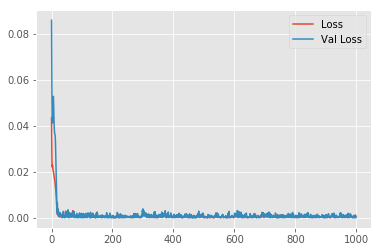

In [14]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [15]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [16]:
# reversing predicted y_test values and rounding up

w = np.sqrt(sum(data**2))
np.round(result*w).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [17]:
# adjusting predicited y_test by rounding

y_test*w

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

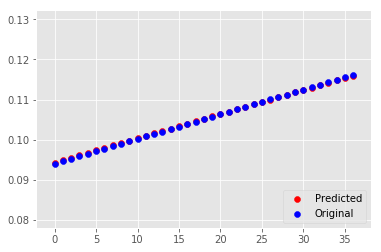

In [18]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

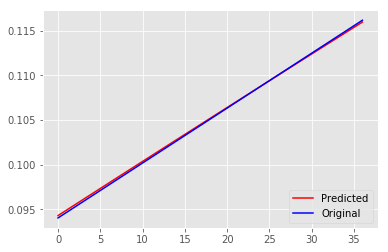

In [19]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Testing the model with untrained dataset X_test 

result_01 = model.predict(X_test).flatten()

In [30]:
# adjusting predicited Y_test values by rounding and adding 0.2

np.round(result_01*w+0.2)

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [31]:
(Y_test*w).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])

In [32]:
# Basic Normalization with own generated dataset

In [33]:
data_01 = np.arange(0,20)
data_01 = np.array(data_01, dtype=float)
data_01.reshape(-1,10)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]])

In [34]:
# normalized with build-in Normalizer function with "norm =l2"

data_01_scaled = Normalizer(norm='l2').fit_transform(data_01.reshape(1,-1))
print(data_01_scaled)

[[0.         0.02012109 0.04024218 0.06036327 0.08048436 0.10060545
  0.12072655 0.14084764 0.16096873 0.18108982 0.20121091 0.221332
  0.24145309 0.26157418 0.28169527 0.30181636 0.32193745 0.34205855
  0.36217964 0.38230073]]


In [35]:
# Manually normalization

w1 = np.sqrt(sum(data_01**2))
data_01_norm = data_01/w1
print(data_01_norm)

[0.         0.02012109 0.04024218 0.06036327 0.08048436 0.10060545
 0.12072655 0.14084764 0.16096873 0.18108982 0.20121091 0.221332
 0.24145309 0.26157418 0.28169527 0.30181636 0.32193745 0.34205855
 0.36217964 0.38230073]


In [36]:
data_01_scaled*w1

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]])

In [37]:
# normalized with build-in Normalizer function with "norm =l1"

data_02_scaled = Normalizer(norm='l1').fit_transform(data_01.reshape(1,-1))
print(data_02_scaled)

[[0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
  0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
  0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
  0.09473684 0.1       ]]


In [38]:
# Manually normalization

w2 = np.sum(data_01)
data_02_norm = data_01/w2
print(data_02_norm)

[0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]


In [39]:
data_02_scaled*w2

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]])

In [40]:
# normalized with build-in Normalizer function with "norm =max"

data_03_scaled = Normalizer(norm='max').fit_transform(data_01.reshape(1,-1))
print(data_03_scaled)

[[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]]


In [41]:
# Manually normalization

w3 = np.max(data_01)
data_03_norm = data_01/w3
print(data_03_norm)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [42]:
data_03_scaled*w3

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]])